In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import keras
from tensorflow.keras.utils import to_categorical
from keras.layers import *
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.13.0


In [2]:
def extract_mfcc(wav_new):
    y, sr = librosa.load(wav_new)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    return mfccs

**Loading the Speech Data**

In [3]:
tess_speech_labels = []
tess_speech_data = []
for Voicetone_emotion_detection, _, filenames in os.walk("C:\\Users\\BIKASH CHANDRA SAHAN\\OneDrive\\Desktop\\Voicetone_emotion_detection\\ravdess_voice"):
    for ravdess_voice in filenames:
        tess_speech_labels.append(int(ravdess_voice[7:8]) - 1)
        wav_new = os.path.join(Voicetone_emotion_detection, ravdess_voice)
        tess_speech_data.append(extract_mfcc(wav_new))

print("Dataset Loading Finished")

Dataset Loading Finished


In [4]:
tess_speech_data

[array([-6.9779260e+02,  5.4890041e+01,  6.6346538e-01,  1.2435786e+01,
         7.7339516e+00,  5.3075022e-01, -3.2166312e+00, -3.1593943e+00,
        -1.0977551e+01, -2.8487108e+00,  8.1529742e-01, -3.0370669e+00,
         1.9554465e+00, -3.7356679e+00,  4.3770036e-01,  7.8235650e-01,
        -4.0714288e+00, -1.8607764e+00, -1.3236902e+00, -9.2046332e-01,
        -5.9476109e+00, -5.0543833e-01, -2.3373914e+00, -4.5227795e+00,
        -1.6797225e+00, -8.1932080e-01, -4.8584828e+00,  2.5533605e-01,
        -2.1487043e+00,  1.4505519e-01, -2.0357563e+00, -2.1196339e+00,
        -2.7125890e+00, -1.8361270e+00, -3.2048051e+00, -1.5453686e+00,
        -1.0909370e+00, -1.7701064e+00, -3.5011320e+00, -1.5380875e+00],
       dtype=float32),
 array([-6.9285577e+02,  5.5363899e+01, -1.5483193e+00,  1.6038305e+01,
         8.8188105e+00, -1.4658636e-01, -1.3733919e+00, -5.2931800e+00,
        -1.1623182e+01, -1.3482838e+00,  8.4371459e-01, -2.6412783e+00,
         1.0172498e+00, -3.2715344e+00, 

**Convert Data and Label to array**

In [5]:
tess_speech_data_array = np.asarray(tess_speech_data)
tess_speech_label_array = np.array(tess_speech_labels)
tess_speech_label_array.shape

labels_categorical = to_categorical(tess_speech_label_array)
labels_categorical.shape

(2880, 8)

In [6]:
tess_speech_data_array.shape

(2880, 40)

In [7]:
x_train,x_test,y_train,y_test= train_test_split(np.array(tess_speech_data_array),labels_categorical, test_size=0.20, random_state=9)

**Splitting the Training, Validation and Testing Sets**

In [9]:
number_of_samples = tess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

**Defining the LSTM Model**

In [10]:
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [11]:
w = np.expand_dims(tess_speech_data_array[:training_samples],-1)

In [12]:
w.shape

(2304, 40, 1)

In [19]:
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(tess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(tess_speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=100, shuffle=True)

Epoch 1/100
72/72 [==============================] - 10s 69ms/step - loss: 2.0592 - accuracy: 0.1528 - val_loss: 1.9992 - val_accuracy: 0.2257
Epoch 2/100
72/72 [==============================] - 4s 51ms/step - loss: 2.0054 - accuracy: 0.2057 - val_loss: 1.9327 - val_accuracy: 0.2743
Epoch 3/100
72/72 [==============================] - 4s 51ms/step - loss: 1.9557 - accuracy: 0.2448 - val_loss: 1.9026 - val_accuracy: 0.2604
Epoch 4/100
72/72 [==============================] - 4s 51ms/step - loss: 1.9156 - accuracy: 0.2678 - val_loss: 1.8552 - val_accuracy: 0.2778
Epoch 5/100
72/72 [==============================] - 4s 51ms/step - loss: 1.8989 - accuracy: 0.2669 - val_loss: 1.8608 - val_accuracy: 0.2535
Epoch 6/100
72/72 [==============================] - 4s 51ms/step - loss: 1.8619 - accuracy: 0.2812 - val_loss: 1.8179 - val_accuracy: 0.3264
Epoch 7/100
72/72 [==============================] - 4s 51ms/step - loss: 1.8373 - accuracy: 0.2760 - val_loss: 1.8140 - val_accuracy: 0.3056
Epoch

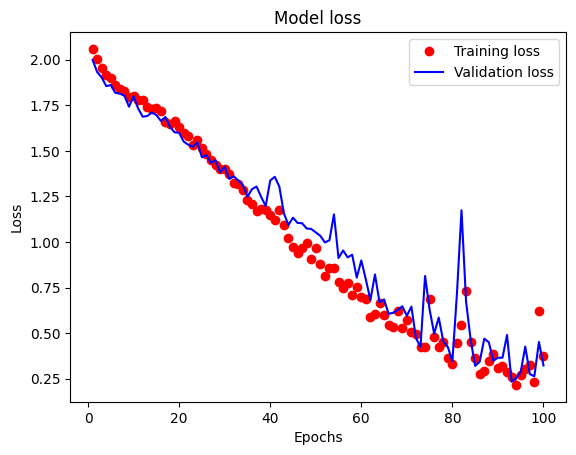

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

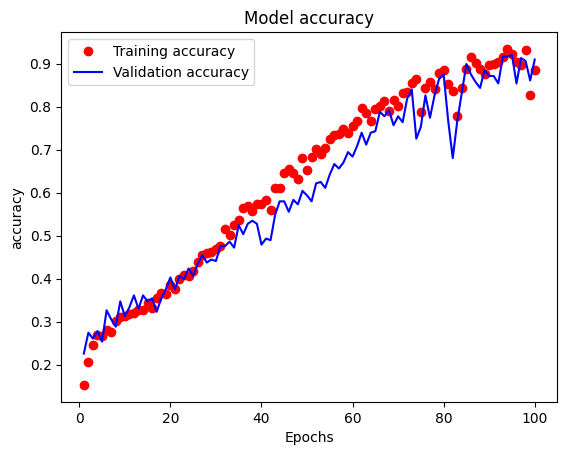

In [22]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [23]:
model_A.evaluate(np.expand_dims(tess_speech_data_array[training_samples + validation_samples:] , -1), labels_categorical[training_samples + validation_samples:])

9/9 [==============================] - 0s 21ms/step - loss: 0.3161 - accuracy: 0.8924


[0.31614476442337036, 0.8923611044883728]

In [25]:
emotions={1 : 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad', 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 'surprised'}
def predict(wav_filepath):
    test_point=extract_mfcc(wav_filepath)
    test_point=np.reshape(test_point,newshape=(1,40,1))
    predictions=model_A.predict(test_point)
    print(emotions[np.argmax(predictions[0])+1])
    

In [27]:
predict("C:\\Users\\BIKASH CHANDRA SAHAN\\OneDrive\\Desktop\\Voicetone_emotion_detection\\ravdess_voice\\Actor_06\\03-01-02-01-02-01-06.wav")

1/1 [==============================] - 1s 1s/step
calm


In [28]:
predict(r"C:\Users\BIKASH CHANDRA SAHAN\OneDrive\Desktop\Voicetone_emotion_detection\ravdess_voice\Actor_10\03-01-02-02-02-02-10.wav")

1/1 [==============================] - 0s 49ms/step
calm


In [29]:
predict(r"C:\Users\BIKASH CHANDRA SAHAN\OneDrive\Desktop\Voicetone_emotion_detection\ravdess_voice\Actor_24\03-01-08-02-02-02-24.wav")

1/1 [==============================] - 0s 56ms/step
surprised


In [30]:
predict(r"C:\Users\BIKASH CHANDRA SAHAN\OneDrive\Desktop\Voicetone_emotion_detection\ravdess_voice\Actor_24\03-01-07-01-02-02-24.wav")

1/1 [==============================] - 0s 57ms/step
disgust


In [32]:
model_A.save('my_model.h5')

In [33]:
modelc=tf.keras.models.load_model('my_model.h5')